In [1]:
import DSGRN
import DSGRN_utils
import dsgrn_boolean

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import json
from dsgrn_boolean.utils.newton import newton_method
from dsgrn_boolean.models.hill import HillFunction
from dsgrn_boolean.utils.dsgrn_sample_to_matrix import extract_parameter_matrices
from dsgrn_boolean.utils.nullclines import plot_nullclines

from dsgrn_boolean.utils.interactive import plot_nullclines_interactive

import numpy as np
import matplotlib.pyplot as plt
from dsgrn_boolean.utils.newton import newton_method
from dsgrn_boolean.models.hill import hill
import json



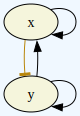

Number of parameter nodes: 196


In [3]:
net_spec = """x : x + y : E
              y : (~x) y : E"""

network = DSGRN.Network(net_spec)

G = DSGRN.DrawGraph(network)
display(G)

parameter_graph = DSGRN.ParameterGraph(network)

print('Number of parameter nodes:', parameter_graph.size())


In [4]:
par_list = [0, 49, 98, 147]

In [5]:
par_index = 98
parameter = parameter_graph.parameter(par_index)

# morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

sampler = DSGRN.ParameterSampler(network)

In [9]:
par_sample = sampler.sample(parameter)
print(par_sample)
L, U, T = extract_parameter_matrices(par_sample, network)

while abs(T[0,0] - T[0,1]) < 1 or abs(T[1,0] - T[1,1]) < 1:
    par_sample = sampler.sample(parameter)
    L, U, T = extract_parameter_matrices(par_sample, network)

# print('Number of equilibrium cells:', len(DSGRN.EquilibriumCells(parameter)))
print(L)
print(U)
print(T)

{"Parameter":{"L[x->x]" : 0.34391419019616459, "L[x->y]" : 0.17417204758233484, "L[y->x]" : 0.002755057780683494, "L[y->y]" : 0.28600758667332948, "T[x->x]" : 1.8292244226219569, "T[x->y]" : 1.8293853816064032, "T[y->x]" : 0.63775237208778457, "T[y->y]" : 0.54769742193066839, "U[x->x]" : 1.1247195190820161, "U[x->y]" : 1.3171416474655993, "U[y->x]" : 1.2473261667832101, "U[y->y]" : 1.1805618124203534}}
[[1.32755729 0.06509753]
 [0.31471262 0.04964574]]
[[3.28061455 1.29288494]
 [2.06918075 4.98508538]]
[[3.63715706 4.91694196]
 [2.7864118  0.92318138]]


In [7]:
# After getting L, U, T matrices:
d = 100
plot_nullclines_interactive(L, U, T, d)

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='d:', min=1.0, step=1.0), Ou…

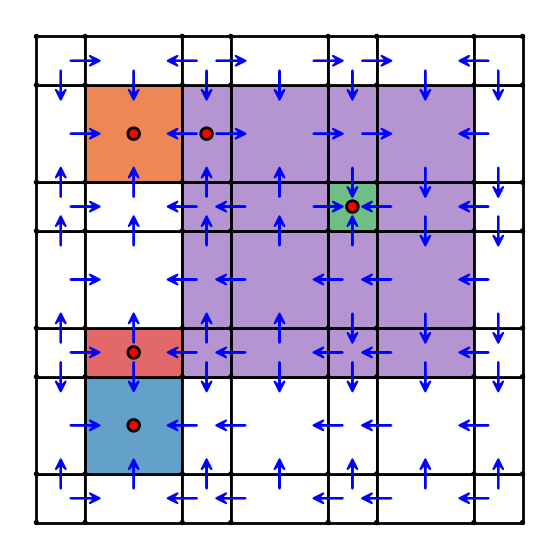

In [8]:
morse_graph, stg, graded_complex = DSGRN_utils.ConleyMorseGraph(parameter)

DSGRN_utils.PlotMorseGraph(morse_graph)
DSGRN_utils.PlotMorseSets(morse_graph, stg, graded_complex)

In [14]:
def count_zeros(L, U, T, d, n_grid=20):
    """Count number of distinct zeros for given parameters"""
    system, jacobian = hill(L, U, T, d)
    
    # Create grid of initial conditions
    x_max = U[0,0] + U[0,1]
    y_max = U[1,0] * U[1,1]
    x_grid = np.linspace(0, x_max, n_grid)
    y_grid = np.linspace(0, y_max, n_grid)
    initial_conditions = [np.array([x, y]) for x in x_grid for y in y_grid]
    
    zeros = []
    for x0 in initial_conditions:
        x, converged, _ = newton_method(system, x0, df=jacobian)
        if converged:
            # Check if this zero is already found
            is_new = True
            for z in zeros:
                if np.allclose(z, x, rtol=1e-5):
                    is_new = False
                    break
            if is_new:
                zeros.append(x)
    
    return len(zeros)

In [28]:
# Generate samples
n_samples = 100
samples = []
for _ in range(n_samples):
    samples.append(sampler.sample(parameter))

In [30]:
# Generate d values
d_values = range(1, 51)
results = []

In [31]:
# Expected number of equilibria
expected_eq = len(DSGRN.EquilibriumCells(parameter))
print("expected_equilibria = ", expected_eq)

expected_equilibria =  5


d = 1: 0.0% match
d = 2: 0.0% match
d = 3: 0.0% match
d = 4: 0.0% match
d = 5: 0.0% match
d = 6: 0.0% match
d = 7: 0.0% match
d = 8: 0.0% match
d = 9: 0.0% match
d = 10: 0.0% match
d = 11: 1.0% match
d = 12: 2.0% match
d = 13: 3.0% match
d = 14: 3.0% match
d = 15: 4.0% match
d = 16: 6.0% match
d = 17: 6.0% match
d = 18: 5.0% match
d = 19: 6.0% match
d = 20: 7.0% match
d = 21: 13.0% match
d = 22: 14.0% match
d = 23: 15.0% match
d = 24: 15.0% match
d = 25: 18.0% match
d = 26: 15.0% match
d = 27: 17.0% match
d = 28: 14.0% match
d = 29: 15.0% match
d = 30: 15.0% match
d = 31: 15.0% match
d = 32: 18.0% match


/Users/bernardo/Desktop/dsgrn_boolean/dsgrn_boolean/models/hill.py:53: RuntimeWarning: overflow encountered in scalar power
  return (self.U - self.L) * self.d * self.theta**self.d * x**(self.d - 1) / (self.theta**self.d + x**self.d)**2


d = 33: 18.0% match
d = 34: 19.0% match
d = 35: 19.0% match
d = 36: 18.0% match
d = 37: 17.0% match
d = 38: 18.0% match
d = 39: 17.0% match
d = 40: 16.0% match
d = 41: 18.0% match
d = 42: 19.0% match
d = 43: 18.0% match
d = 44: 20.0% match
d = 45: 17.0% match
d = 46: 16.0% match
d = 47: 17.0% match
d = 48: 15.0% match
d = 49: 16.0% match
d = 50: 17.0% match


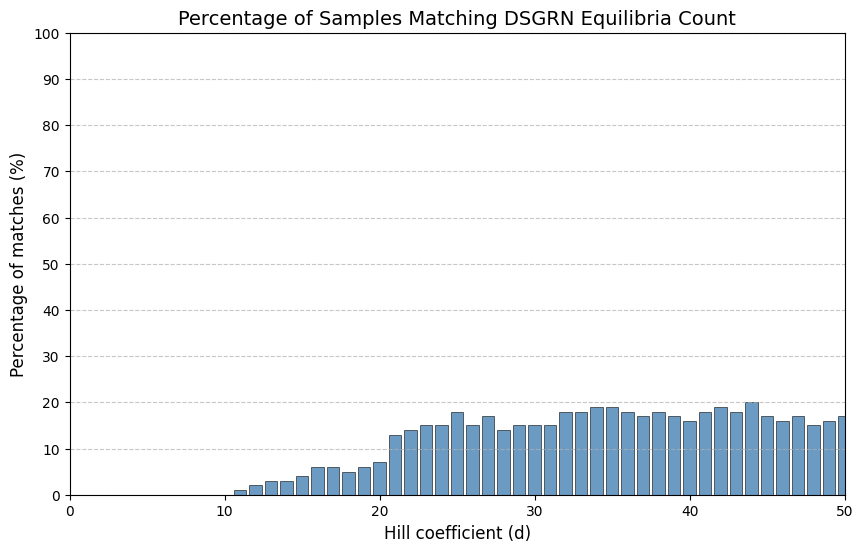


Summary:
Expected equilibria: 5
Best match percentage: 20.0% at d = 44
Worst match percentage: 0.0% at d = 1


In [32]:
# For each d value
for d in d_values:
    matches = 0
    
    # For each sample
    for sample in samples:
        L,U,T = extract_parameter_matrices(sample, network)
        
        # Count zeros
        n_zeros = count_zeros(L, U, T, d)
        
        # Check if matches expected number
        if n_zeros == expected_eq:
            matches += 1
    
    # Calculate percentage of matches
    percentage = (matches / len(samples)) * 100
    results.append(percentage)
    print(f"d = {d}: {percentage:.1f}% match")

plt.figure(figsize=(10, 6))
plt.bar(d_values, results, 
        width=0.8,            
        alpha=0.8,            
        color='steelblue',    
        edgecolor='black',    
        linewidth=0.5)        

plt.xlabel('Hill coefficient (d)', fontsize=12)
plt.ylabel('Percentage of matches (%)', fontsize=12)
plt.title('Percentage of Samples Matching DSGRN Equilibria Count', fontsize=14)
plt.ylim(0, 100)
plt.xlim(0,max(d_values))

# Set y-axis ticks at integers from 0 to 100
plt.yticks(range(0, 101, 10))  # Creates ticks at 0,10,20,...,100

# Add horizontal grid lines only at the integer ticks
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Customize tick labels
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

# Print final statistics
print(f"\nSummary:")
print(f"Expected equilibria: {expected_eq}")
print(f"Best match percentage: {max(results):.1f}% at d = {d_values[np.argmax(results)]}")
print(f"Worst match percentage: {min(results):.1f}% at d = {d_values[np.argmin(results)]}")

In [27]:
# After getting L, U, T matrices:
d = max(d_values)
print(d)
L,U,T = extract_parameter_matrices(samples[0], network)
plot_nullclines_interactive(L, U, T, 100)

20


interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='d:', min=1.0, step=1.0), Ou…